In [1]:
import knitpyter

#@knit in/param/parameters/gestation=_pos:gestation:out/table
# FIXME unused dependency to disambiguate flow terminal
#@knit in/param/parameters/unused=_pos:freq:out/table

gestation = knitpyter.ref('gestation', 'fe5bfe6584ab3397ab5c404879582f4b81bc572c')

In [5]:
df = knitpyter.bigquery_table(gestation)
df

,name,count
0,James,4942431
1,John,4834422
2,Robert,4718787
3,Michael,4297230
4,William,3822209


Text(0, 0.5, 'Count')

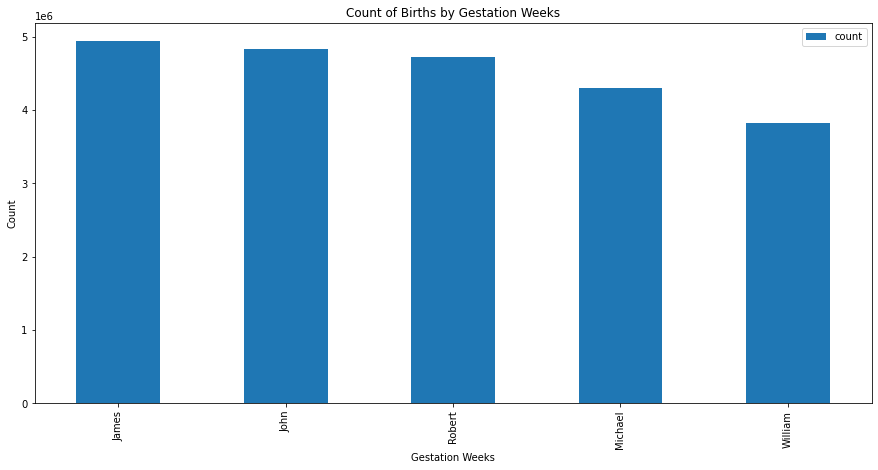

In [6]:
ax = df.plot(kind="bar", x="gestation_weeks", y="count", figsize=(15, 7))
ax.set_title("Count of Births by Gestation Weeks")
ax.set_xlabel("Gestation Weeks")
ax.set_ylabel("Count")